Step-by-Step Guide for EDA :Diabetic Data Analysis

1. Data Loading and Inspection


Objective: Load the data and get a general understanding of its structure and characteristics.

*   Action: Load the dataset using pandas.read_csv() and perform initial inspections with head(), info(), and describe().

In [4]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Project(DEPI)/diabetic_data.csv')

# Basic inspection
data.head(), data.info(), data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

(   encounter_id  patient_nbr             race  gender      age weight  \
 0       2278392      8222157        Caucasian  Female   [0-10)      ?   
 1        149190     55629189        Caucasian  Female  [10-20)      ?   
 2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
 3        500364     82442376        Caucasian    Male  [30-40)      ?   
 4         16680     42519267        Caucasian    Male  [40-50)      ?   
 
    admission_type_id  discharge_disposition_id  admission_source_id  \
 0                  6                        25                    1   
 1                  1                         1                    7   
 2                  1                         1                    7   
 3                  1                         1                    7   
 4                  1                         1                    7   
 
    time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
 0                 1  ...          No      No     



*  Explanation:

  *  data.head() provides the first 5 rows of the dataset, offering an overview of the data.
  *  data.info() gives the summary of the data, including column types, non-null counts, and memory usage.
   * data.describe() generates summary statistics for numerical columns, such as mean, median, and standard deviation.


**2. Handling Missing Data**

2. Handling Missing Data
 Objective: Identify and address any missing values in the dataset. In this step, we will handle missing values for columns such as race, payer_code, medical_specialty, and diagnosis columns, filling them with the most frequent value (mode).

   * Drop unnecessary columns: Drop the weight column if it is not needed for analysis.

   * Fill missing values: Fill missing values in categorical columns (race, payer_code, medical_specialty, diag_1, diag_2, diag_3) with the mode (most frequent value).

In [5]:
# Drop the 'weight' column
data = data.drop(columns=['weight'])

# Fill missing values for selected columns with the mode (most frequent value)
data['race'] = data['race'].fillna(data['race'].mode()[0])
data['payer_code'] = data['payer_code'].fillna(data['payer_code'].mode()[0])
data['medical_specialty'] = data['medical_specialty'].fillna(data['medical_specialty'].mode()[0])
data['diag_1'] = data['diag_1'].fillna(data['diag_1'].mode()[0])
data['diag_2'] = data['diag_2'].fillna(data['diag_2'].mode()[0])
data['diag_3'] = data['diag_3'].fillna(data['diag_3'].mode()[0])

# Check if all missing values have been handled
print(data.isnull().sum())  # Verify that there are no more missing values
print(data.shape)  # Check the shape of the dataset after cleaning


encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

**Key Findings:**

   * Missing values were handled by either filling with a default value ('No Test') or using the mode of the column.
   *  After filling, no missing values remain in the dataset.

**3. Converting Data Types**

In order to work with the data effectively, certain columns need to be converted to appropriate data types. This ensures that numerical columns are treated as numbers and categorical columns as categories.

   * Age Column: The age column contains ranges (e.g., [0-10)), so we need to extract the lower bound of the range and convert it to numeric.
   * Gender and Race Columns: These should be converted to categorical data types for better memory management.
   *  Num Lab Procedures Column: We handle non-numeric values in num_lab_procedures by converting them to NaN and then imputing with the median value.

In [6]:
# Convert 'age' column if needed, by extracting numeric values from ranges like '[0-10)'
if data['age'].dtype == 'object':  # Check if 'age' is still in string format
    data['age'] = data['age'].str.extract(r'(\d+)').astype(float)  # Extract the number before the hyphen

# Convert 'num_lab_procedures' to integers (check for non-numeric entries first)
data['num_lab_procedures'] = pd.to_numeric(data['num_lab_procedures'], errors='coerce')  # Convert non-numeric to NaN
data['num_lab_procedures'] = data['num_lab_procedures'].fillna(data['num_lab_procedures'].median()).astype(int)  # Impute missing values with median and convert to int

# Convert 'gender' and 'race' columns to categorical type
data['gender'] = data['gender'].astype('category')
data['race'] = data['race'].astype('category')

# Check data types after transformation
print(data.info())

# Optional: Check summary statistics to confirm everything is correct
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   encounter_id              101766 non-null  int64   
 1   patient_nbr               101766 non-null  int64   
 2   race                      101766 non-null  category
 3   gender                    101766 non-null  category
 4   age                       101766 non-null  float64 
 5   admission_type_id         101766 non-null  int64   
 6   discharge_disposition_id  101766 non-null  int64   
 7   admission_source_id       101766 non-null  int64   
 8   time_in_hospital          101766 non-null  int64   
 9   payer_code                101766 non-null  object  
 10  medical_specialty         101766 non-null  object  
 11  num_lab_procedures        101766 non-null  int64   
 12  num_procedures            101766 non-null  int64   
 13  num_medications           101

**Key Findings:**

   * The age column was transformed from a range to numeric values.
   * The num_lab_procedures column was cleaned and converted into integers.
   * The gender and race columns were successfully converted to categorical data types

**4. Univariate Analysis**

Univariate analysis helps us understand the distribution of individual variables. We’ll explore both numerical and categorical variables.


**Numerical Variables:**

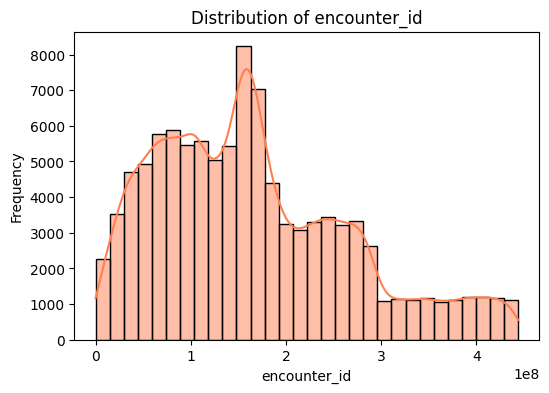

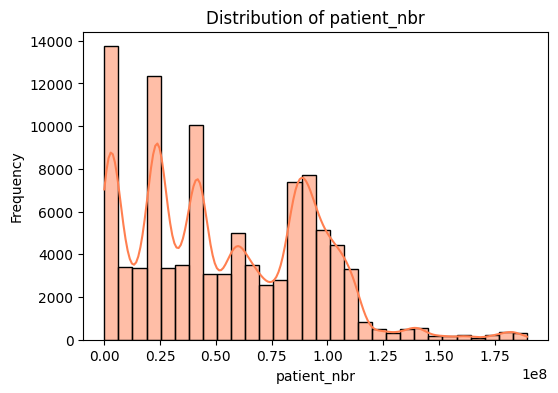

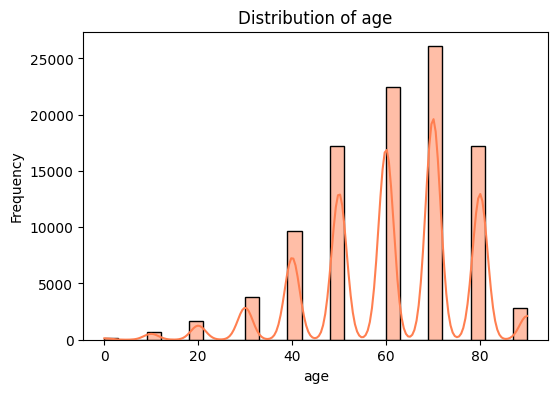

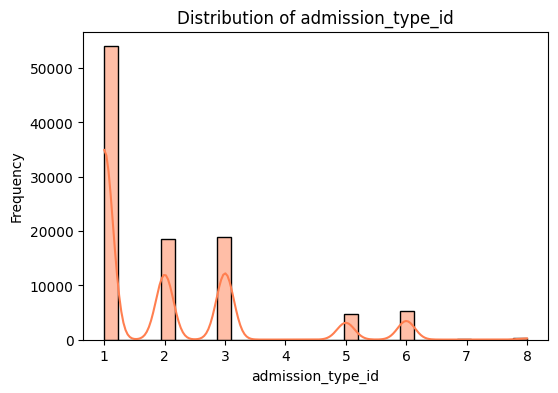

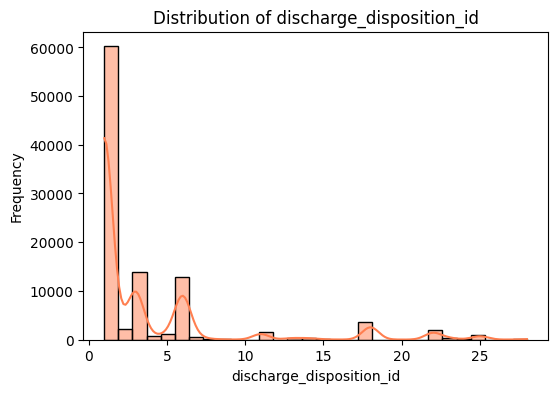

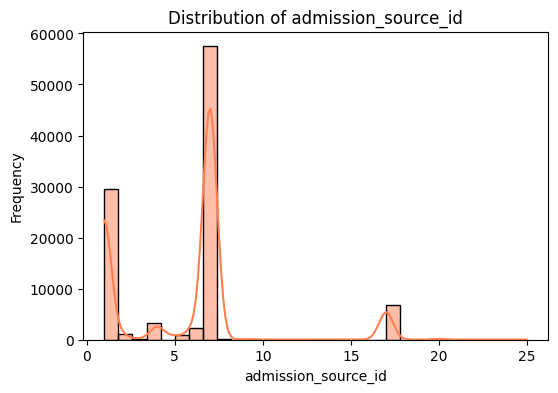

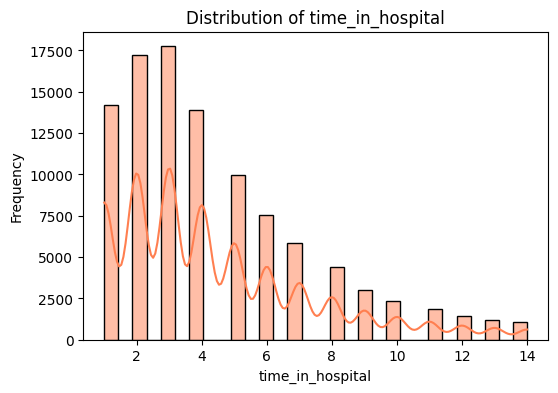

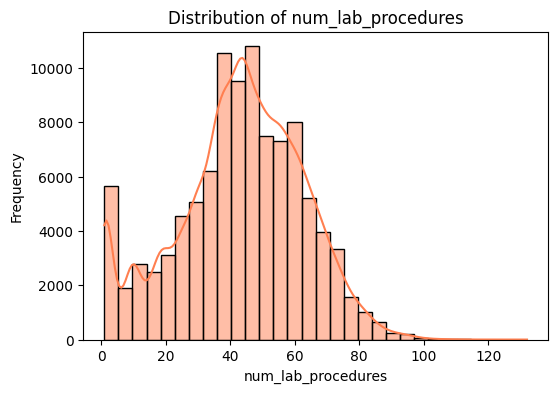

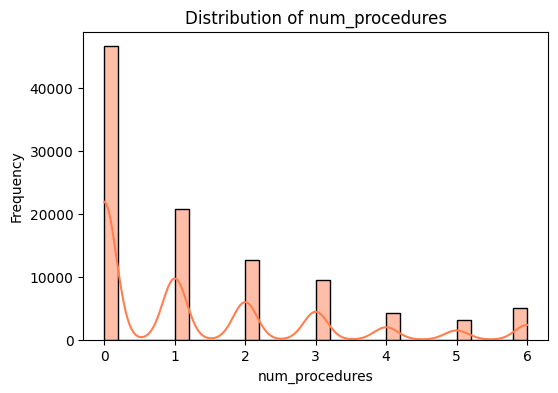

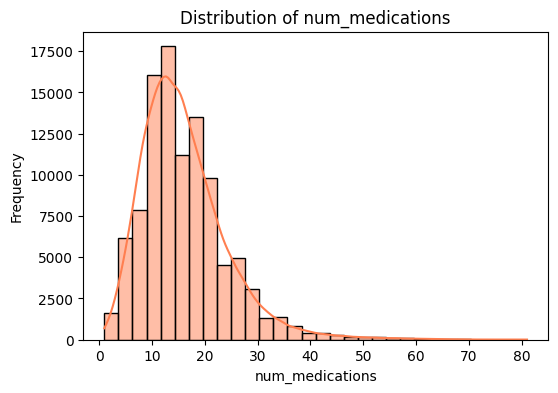

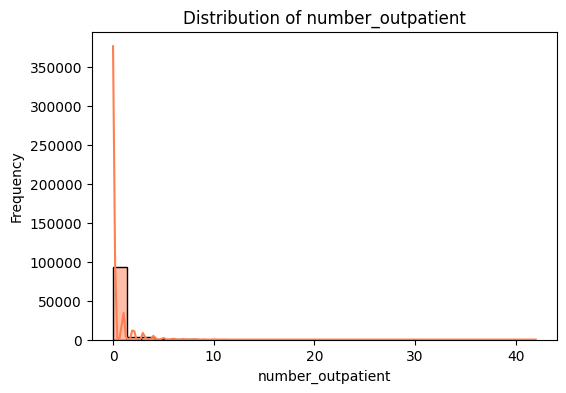

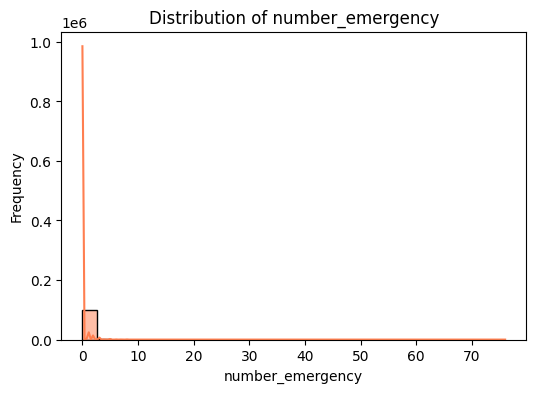

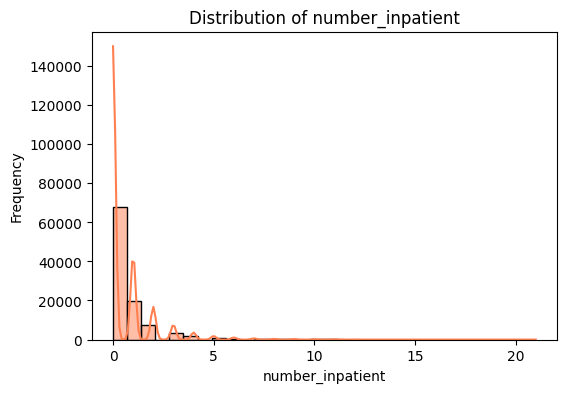

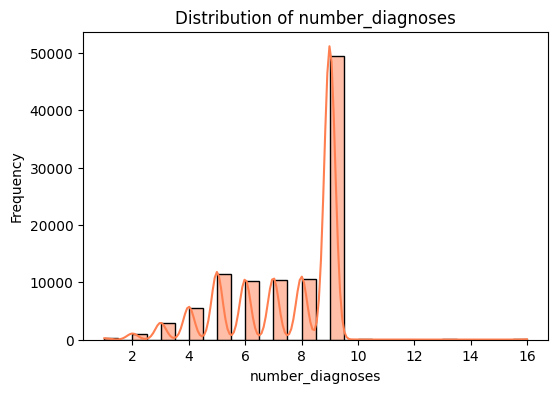

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of numerical variables
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30, color='coral')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


**Categorical Variables:**

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


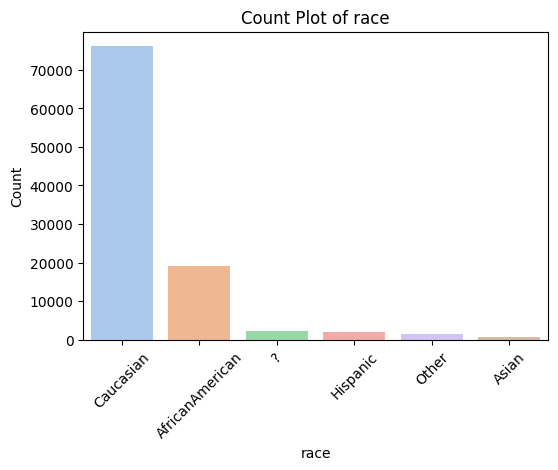

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


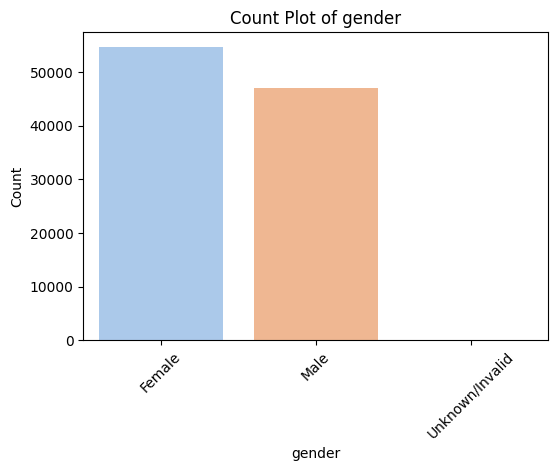

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


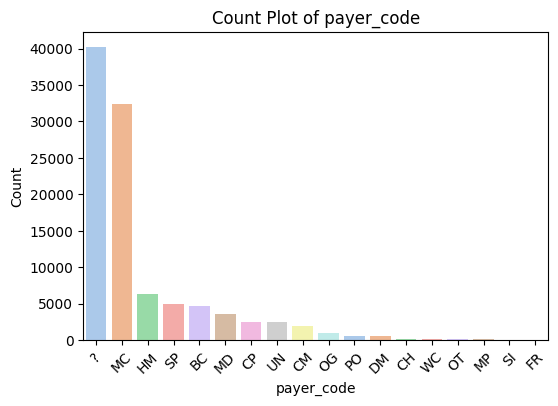

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


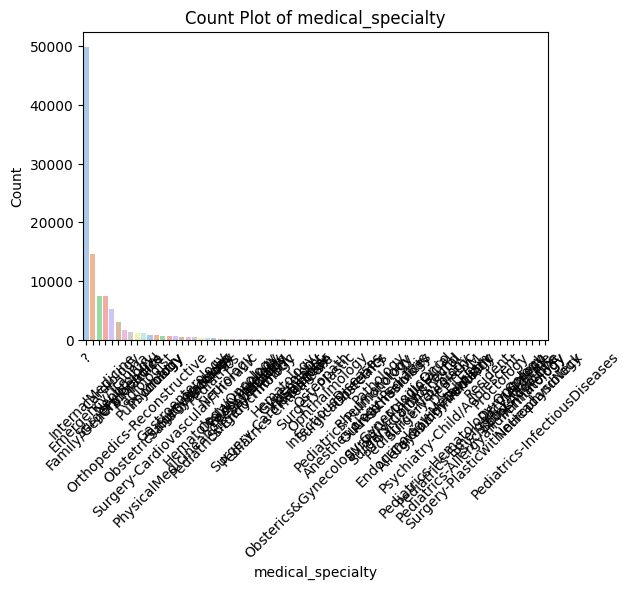

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


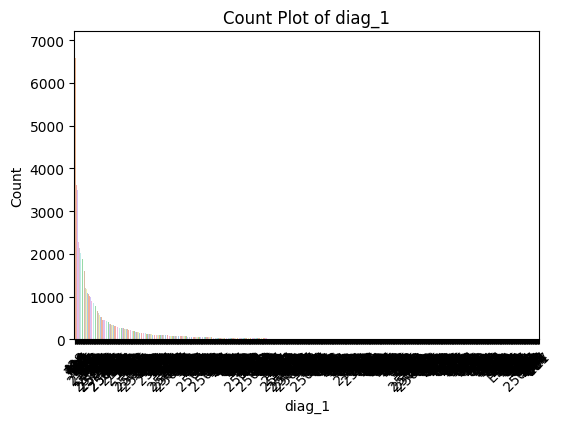

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


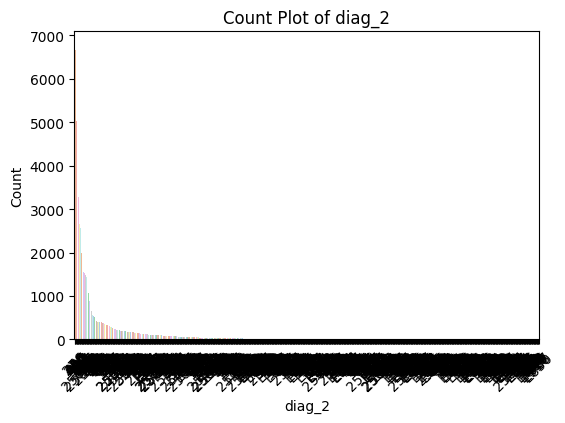

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


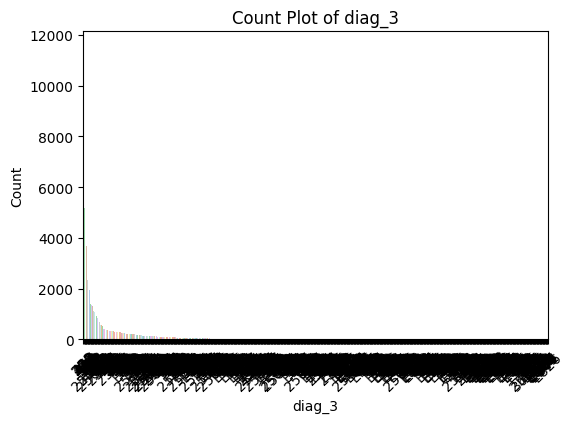

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


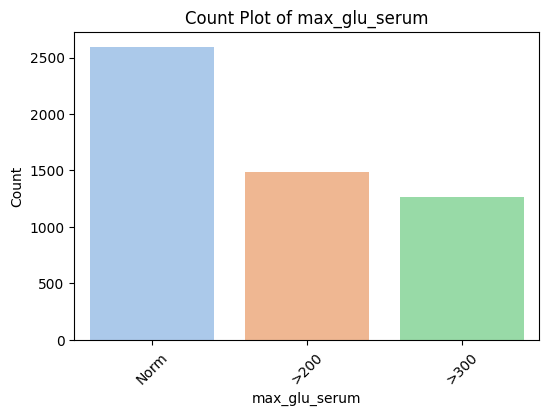

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


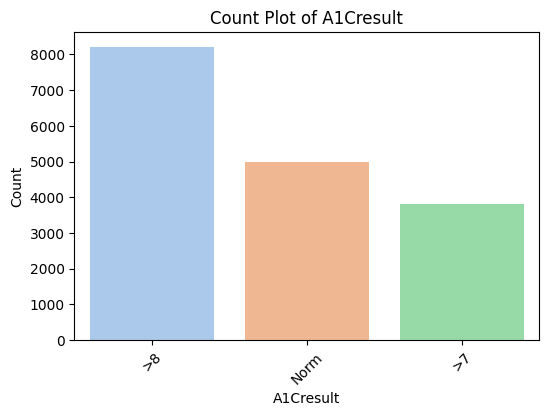

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


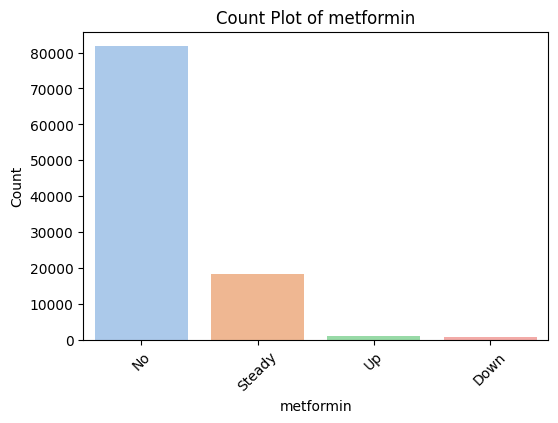

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


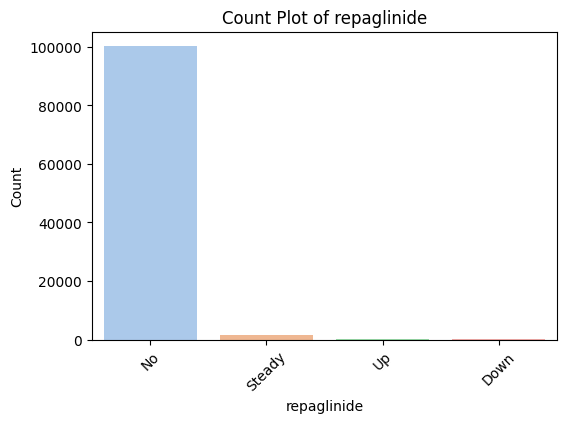

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


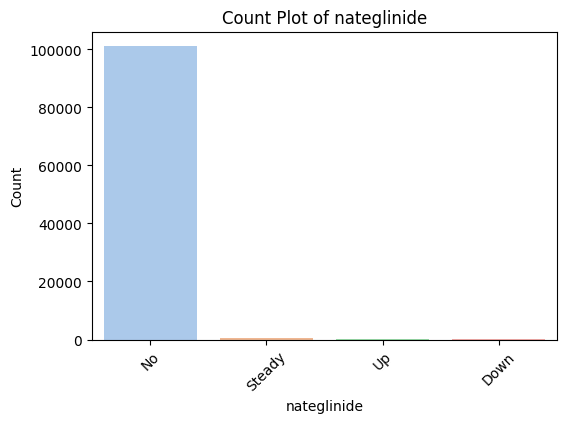

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


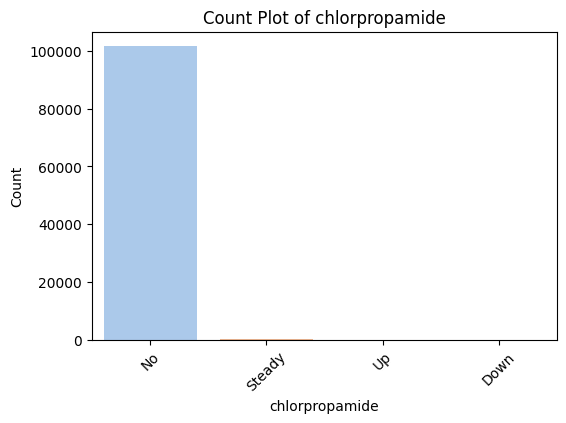

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


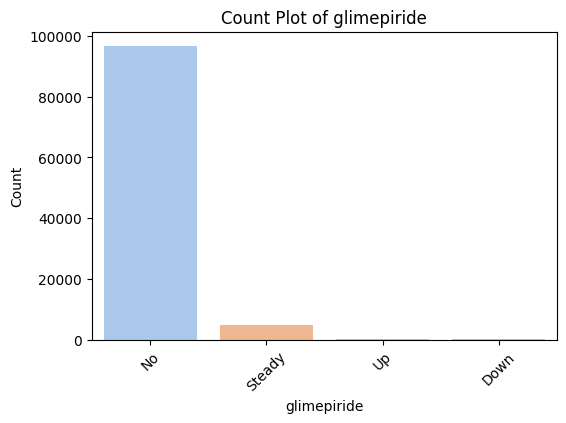

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


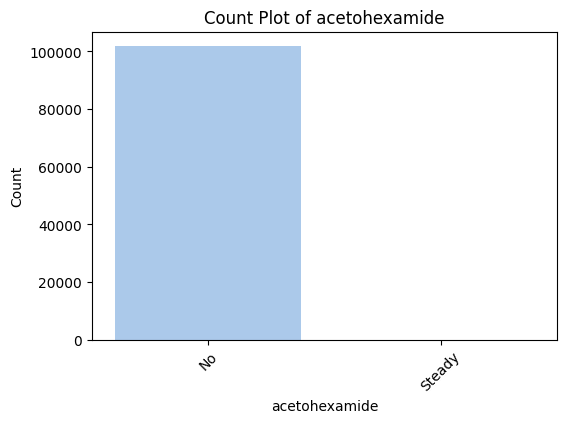

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


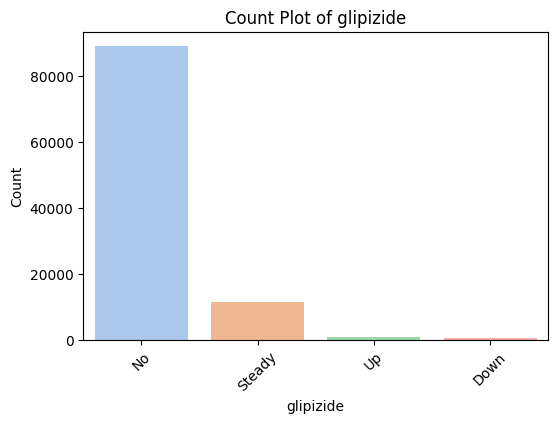

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


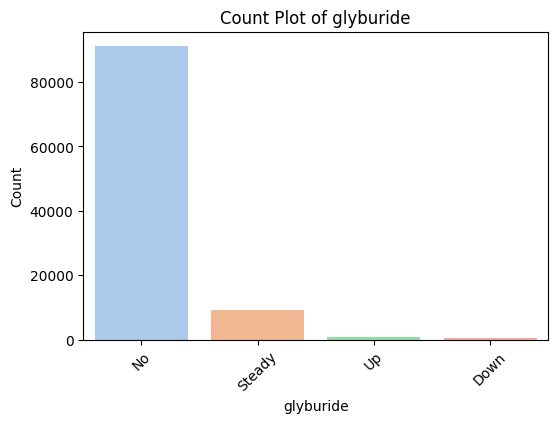

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


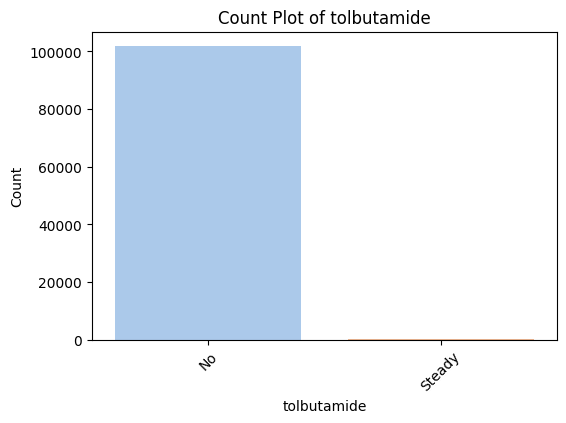

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


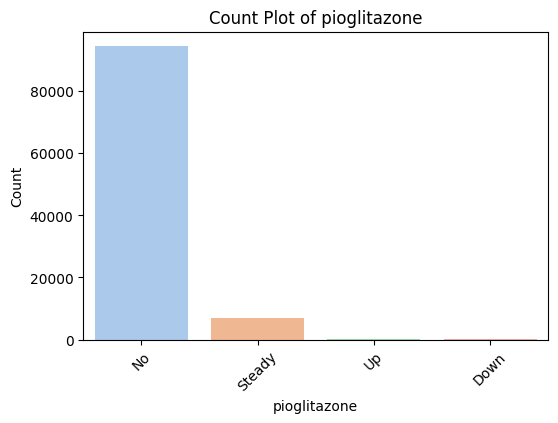

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


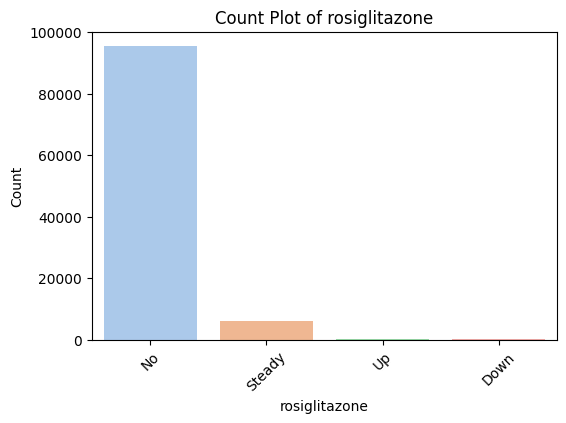

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


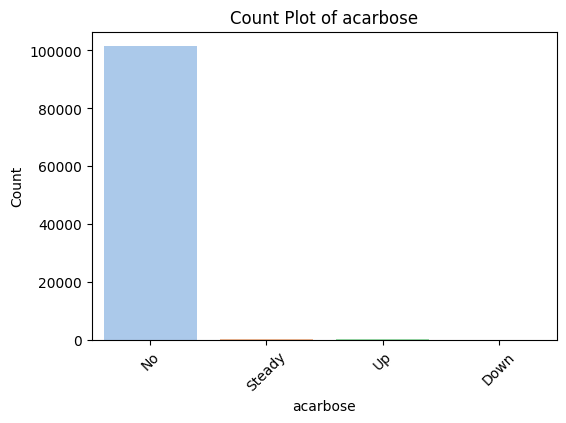

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


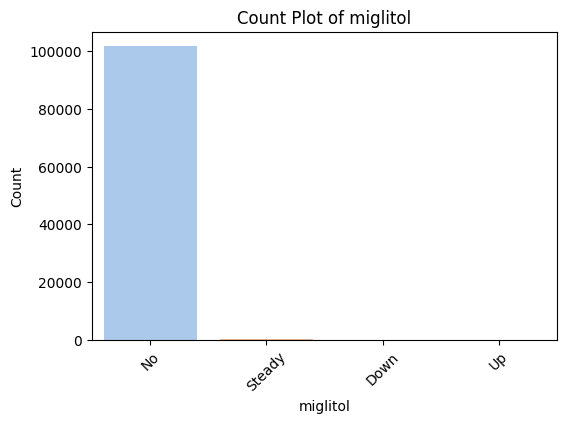

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


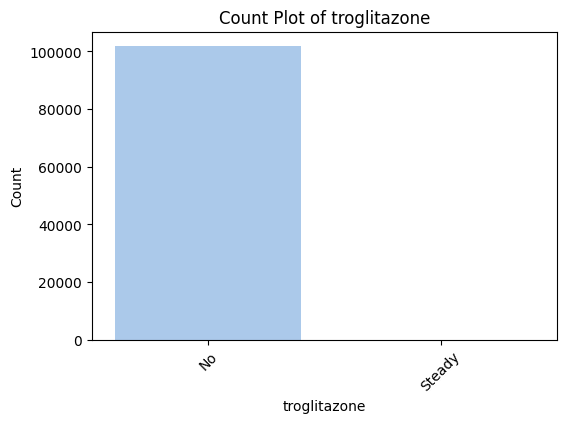

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


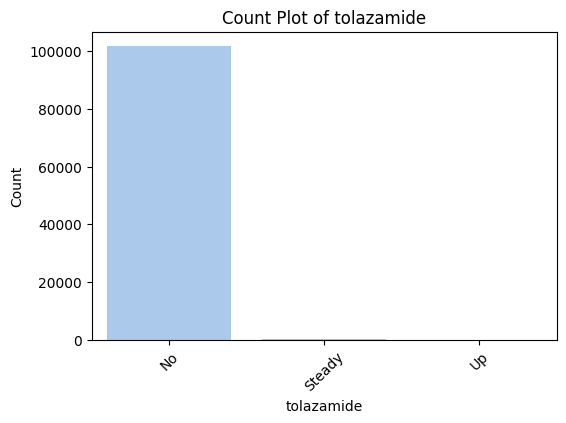

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


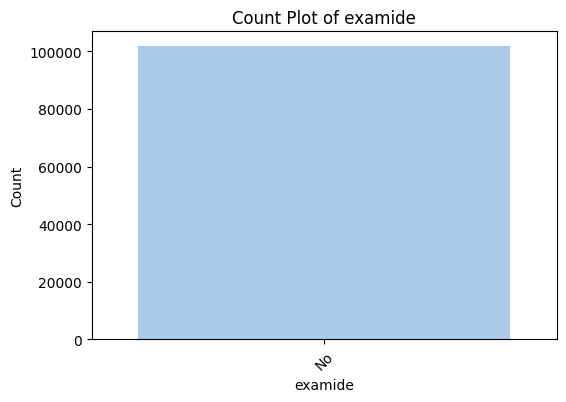

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


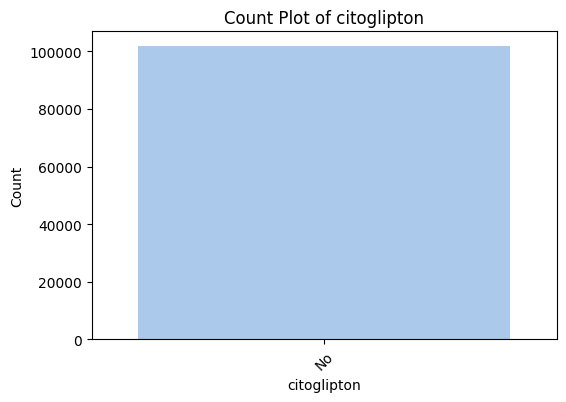

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


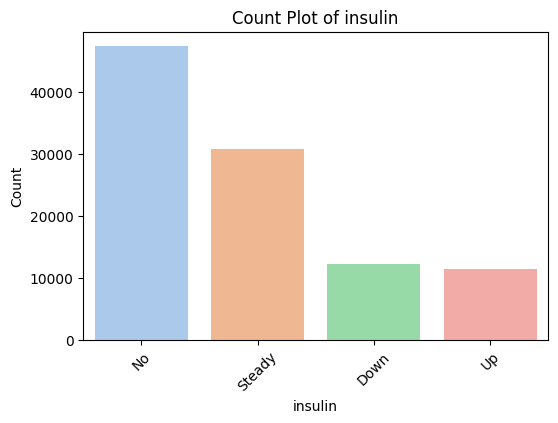

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


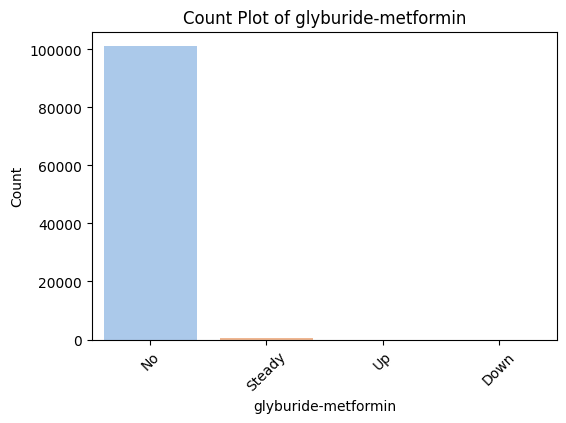

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


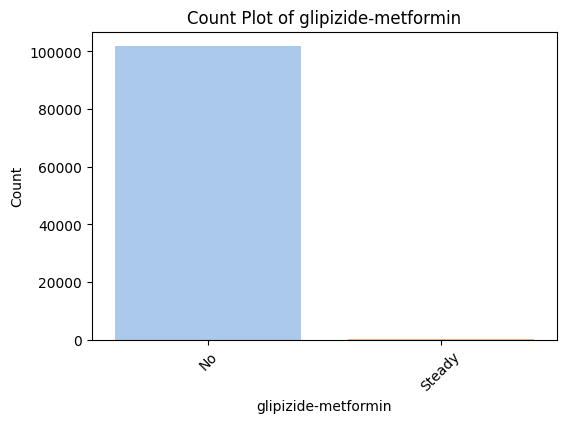

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


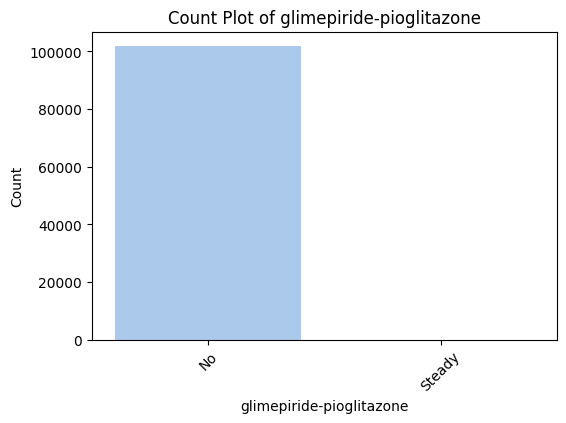

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


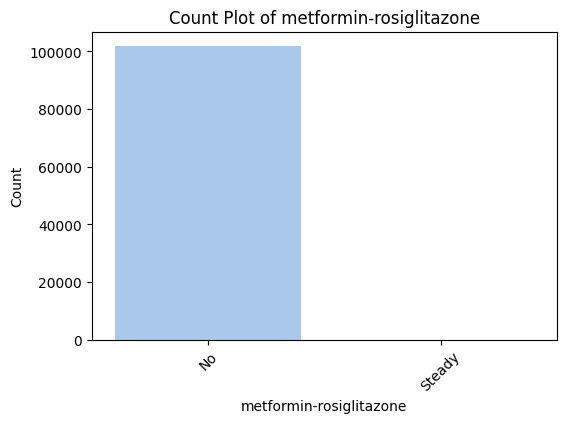

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


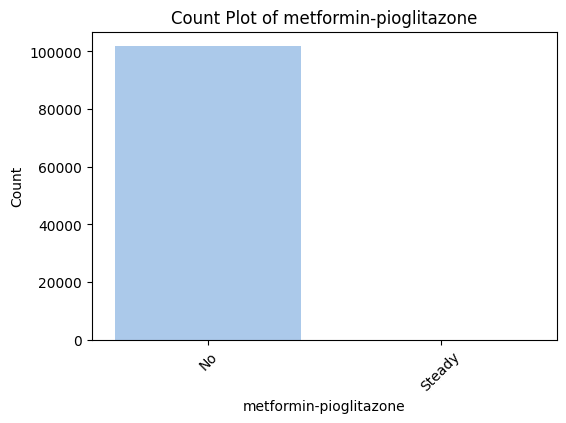

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


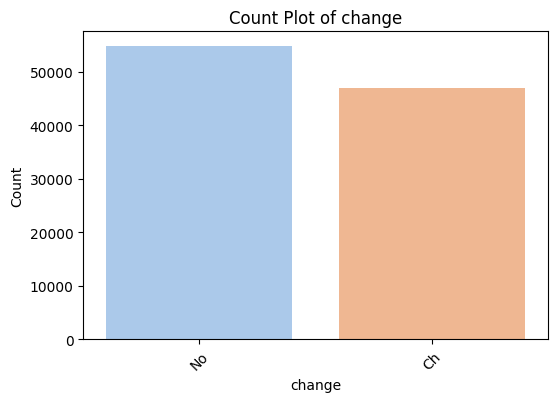

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


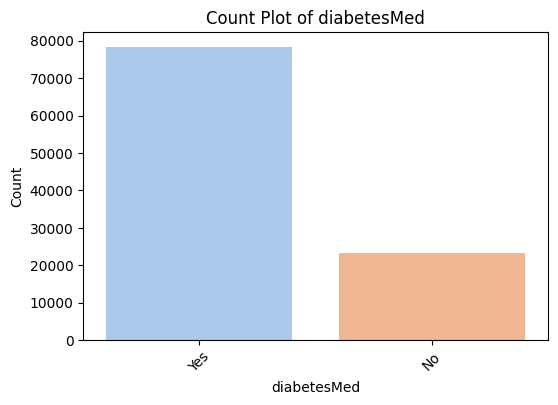

<ipython-input-8-68e13d3bea3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")


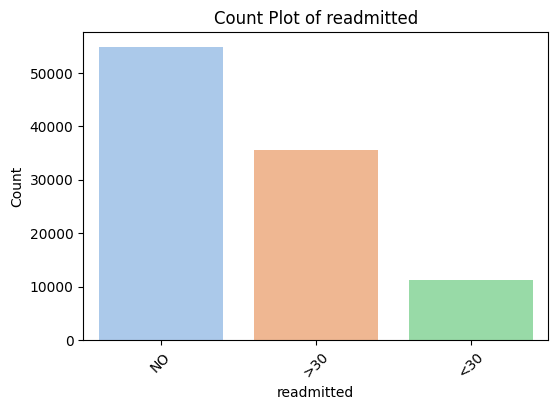

In [8]:
# Visualize count distributions for categorical variables
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette="pastel")
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


Key Findings:

  *  Numerical variables like num_lab_procedures, age, and others were visually inspected for their distribution.
  *  Categorical variables like gender and race were checked for their distribution and frequency.

**5. Bivariate Analysis**

Next, we explore relationships between pairs of variables to understand how they are interrelated.

  *  Correlation Heatmap: Shows the correlation between numerical variables.
  *  Pair Plot: Visualizes pairwise relationships among numerical variables.

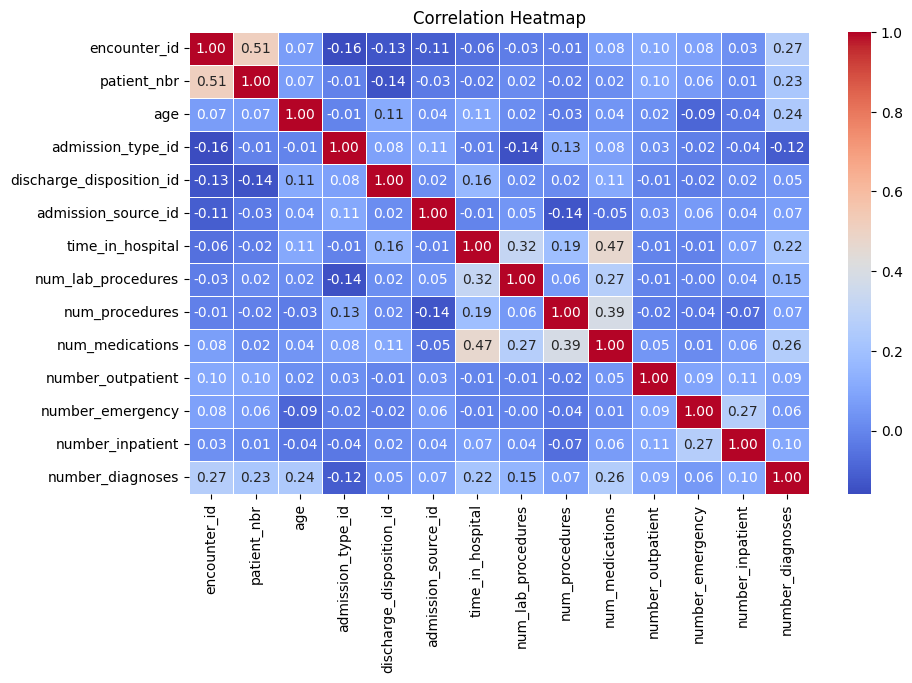

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

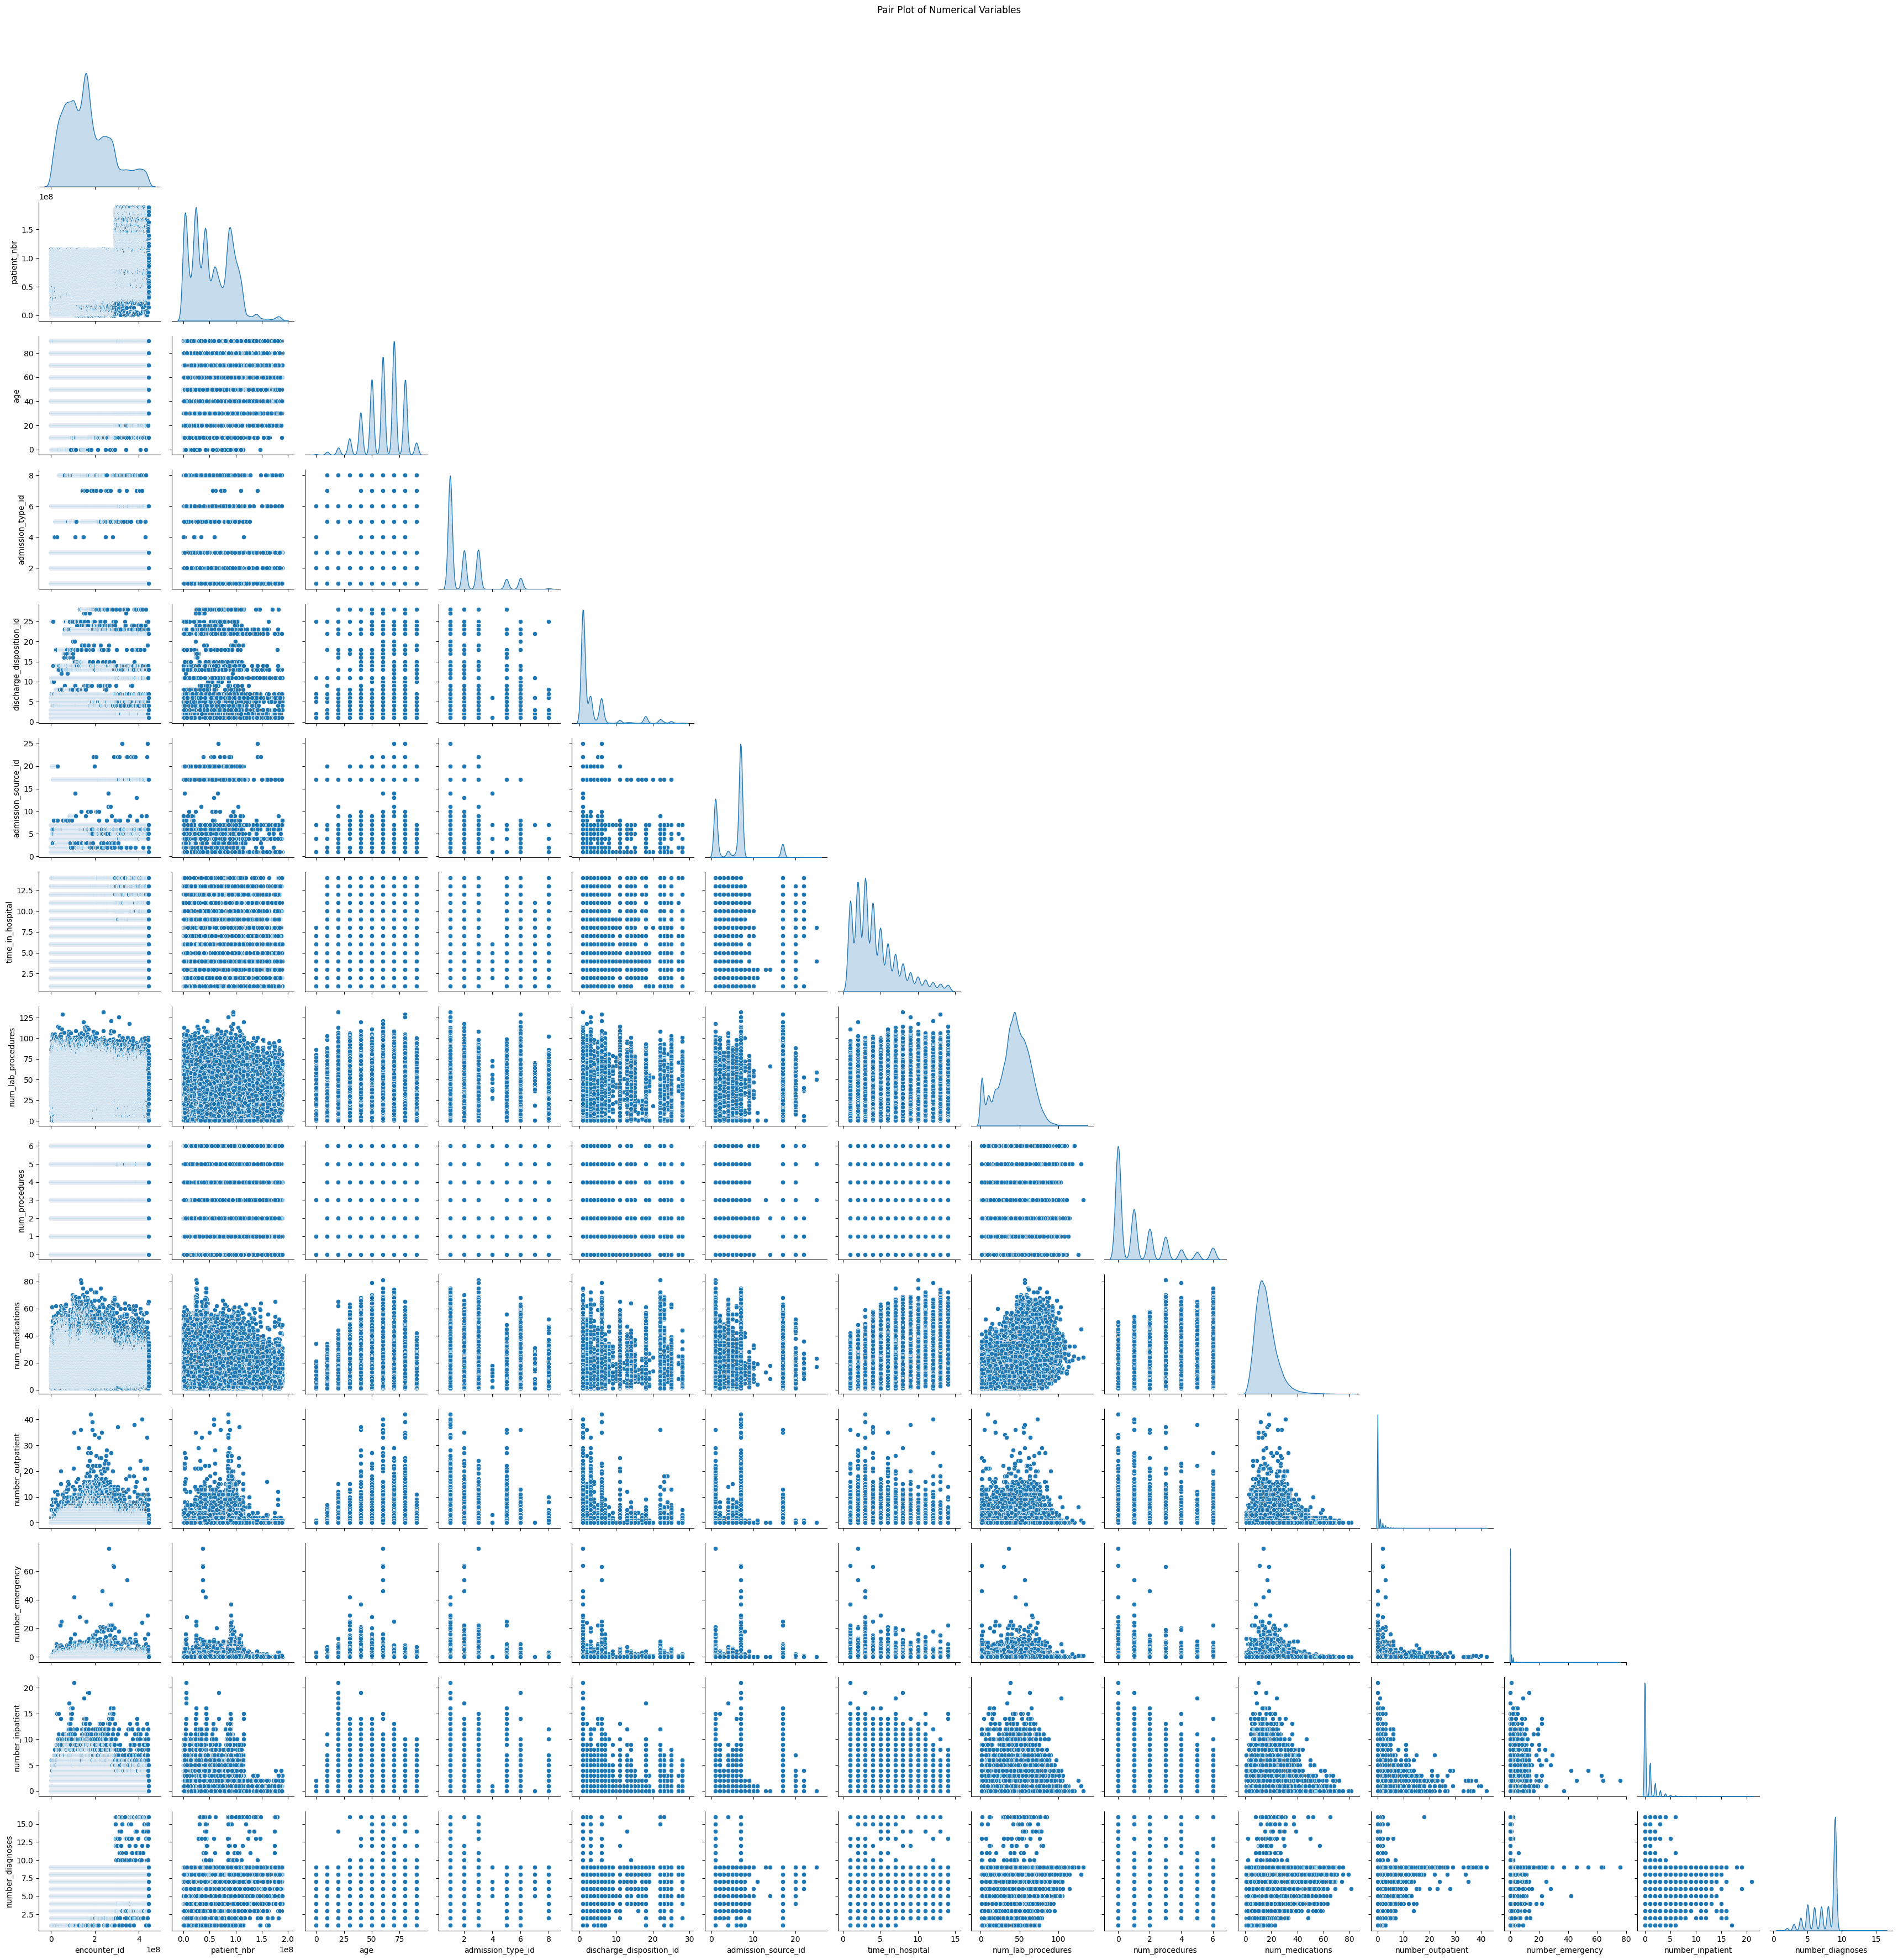

In [9]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(
    data[numerical_columns].corr(),
    annot=True,
    cmap='coolwarm', fmt='.2f', linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.show()

# Pair plot for numerical variables
sns.pairplot(data[numerical_columns], diag_kind='kde', corner=True, palette='husl')
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()


Key Findings:

   * The correlation heatmap allows us to see how strongly different numerical variables are related.
   * Pair plots provide insights into how numerical variables interact with each other.

**6. Multivariate Analysis**

For multivariate analysis, we can use scatter plots with additional dimensions or use interactive visualization tools like Plotly.

In [10]:
import plotly.express as px

# Example scatter plot for Age vs Time in Hospital, colored by readmission status
fig = px.scatter(
    data, x='age', y='time_in_hospital', color='readmitted',
    title="Scatter Plot: Age vs Time in Hospital",
    labels={'age': 'Age', 'time_in_hospital': 'Time in Hospital'},
    opacity=0.7
)
fig.show()

# Example histogram of Age by Readmission Status
fig = px.histogram(
    data, x='age', color='readmitted', nbins=30,
    title="Histogram of Age by Readmission Status",
    labels={'age': 'Age', 'count': 'Count'}
)
fig.update_layout(bargap=0.2)
fig.show()


**Key Findings:**

   * Visualizations like scatter plots and histograms offer deeper insights into relationships among multiple variables, especially categorical ones like readmitted.



**Conclusion**

Through this exploratory data analysis, we have:

   *  Cleaned the dataset by handling missing values and converting columns to appropriate data types.
   * Performed univariate, bivariate, and multivariate analyses to uncover relationships between variables.
   * Visualized the data using several plotting techniques to enhance understanding.

This process is now ready for further modeling or analysis tasks.